In [1]:
from google.colab import drive   
drive.mount('/content/gdrive')  # change working path of google colab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/My Drive/Colab Notebooks/20191119_D001Q1"
import os
os.chdir(path)
!ls   #確認path已經到local目錄

Day001_read_image_HW.ipynb		Day004_Sample.ipynb
Day001_read_image_Sample.ipynb		Day005_draw_HW.ipynb
Day002_change_color_space_HW.ipynb	Day005_Sample.ipynb
Day002_change_color_space_Sample.ipynb	Day006_affine_HW.ipynb
Day003_color_spave_op_HW.ipynb		Day006_Sample.ipynb
Day003_color_spave_op_Sample.ipynb	Part01
Day004_geometric_transform_HW.ipynb


# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [0]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Part01/GF_4.jpg')

## Affine Transformation - Case 2: any three point

In [0]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[200,200], [400,600], [800,900]], dtype=np.float32)
pt2 = np.array([[250,250], [450,650], [850,950]], dtype=np.float32)

In [48]:
# 取得 affine 矩陣並做 affine 操作
fx=0.5; fy=0.5; ang=np.pi/4
M_affine = np.array(([fx*np.cos(ang), -np.sin(ang),100],[np.sin(ang),fy*np.cos(ang),50]),dtype=np.float32)
M_affine

array([[  0.35355338,  -0.70710677, 100.        ],
       [  0.70710677,   0.35355338,  50.        ]], dtype=float32)

In [0]:
new_h, new_w=np.array((img.shape[1]*fy, img.shape[0]*fx),dtype=np.int32)

In [0]:
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))

In [0]:
# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 20, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 10, (0, 255, 0), 10)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 20, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 10, (0, 255, 0), 10)

# 組合 + 顯示圖片
#img_show_affine = np.hstack((img_copy, img_affine))


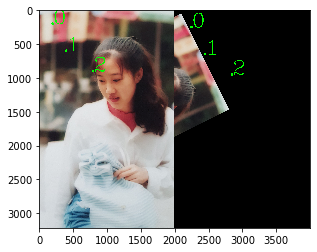

In [52]:
img_show_affine = np.hstack((img_copy, img_affine))
img_show_rgb = cv2.cvtColor(img_show_affine, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)